# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans ,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Load datasets
garis_kemiskinan = pd.read_csv('https://raw.githubusercontent.com/DcCode46/Machine-Learning-Project/refs/heads/main/archive/garisKemiskinan.csv')
min_upah = pd.read_csv('https://raw.githubusercontent.com/DcCode46/Machine-Learning-Project/refs/heads/main/archive/minUpah.csv')
pengeluaran = pd.read_csv('https://raw.githubusercontent.com/DcCode46/Machine-Learning-Project/refs/heads/main/archive/pengeluaran.csv')
rata_rata_upah = pd.read_csv('https://raw.githubusercontent.com/DcCode46/Machine-Learning-Project/refs/heads/main/archive/rataRataUpah.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi dasar dataset
datasets = {
    "garis_kemiskinan": garis_kemiskinan,
    "min_upah": min_upah,
    "pengeluaran": pengeluaran,
    "rata_rata_upah": rata_rata_upah
}

In [4]:
# 1. Memahami Struktur Data
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print(df.head(), "\n")

Dataset: garis_kemiskinan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None
  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0 

Dataset: min_upah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Colu

In [5]:
# 2. Menangani Data yang Hilang
for name, df in datasets.items():
    missing_values = df.isnull().sum()
    print(f"Missing values in {name}:\n{missing_values}\n")

Missing values in garis_kemiskinan:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing values in min_upah:
provinsi     0
tahun        0
ump         24
dtype: int64

Missing values in pengeluaran:
provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

Missing values in rata_rata_upah:
provinsi    0
tahun       0
upah        0
dtype: int64



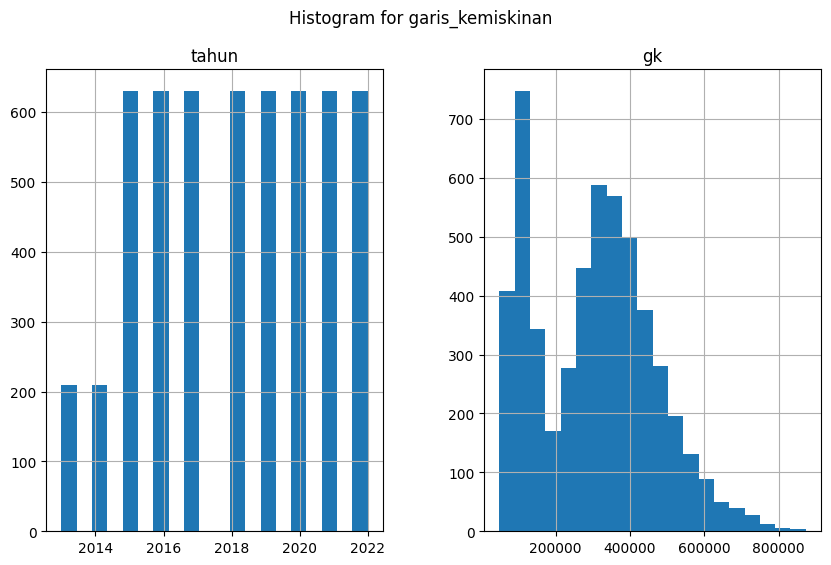

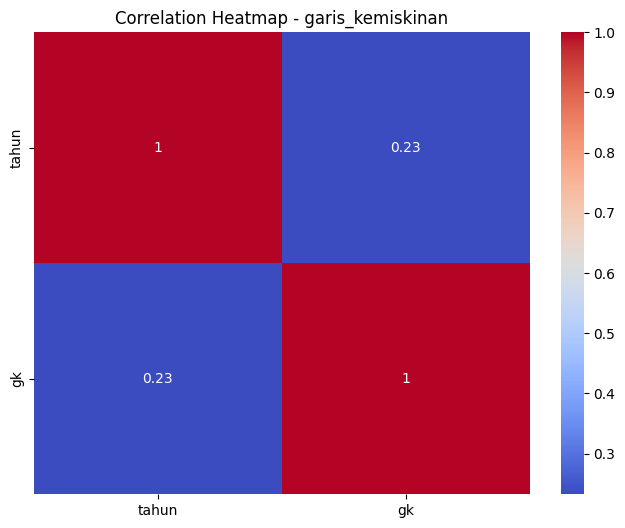

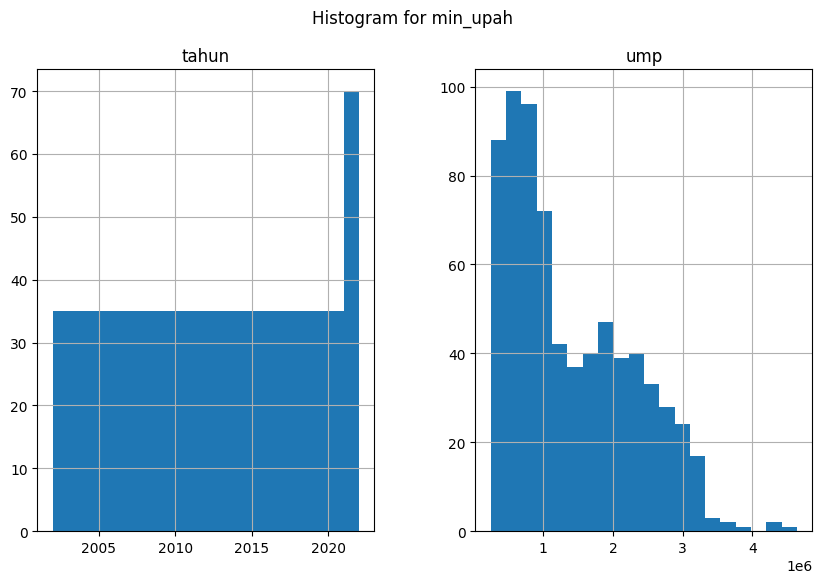

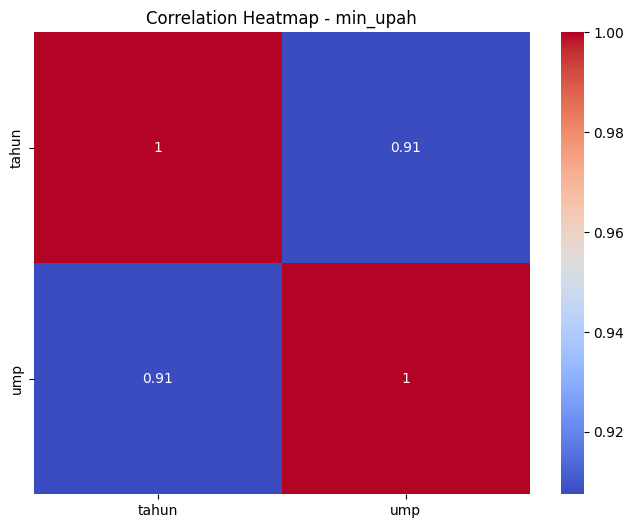

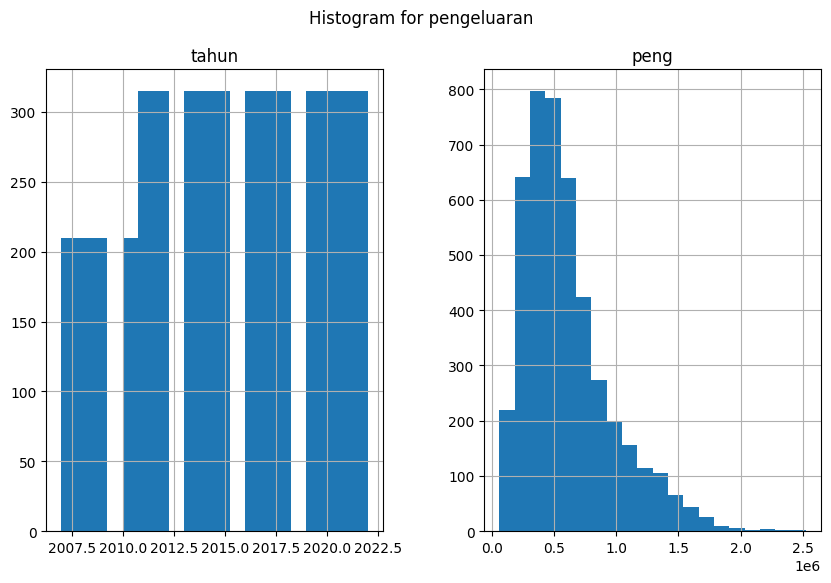

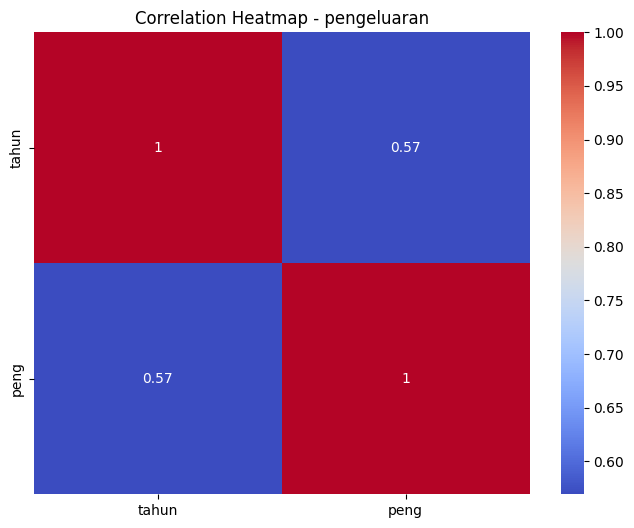

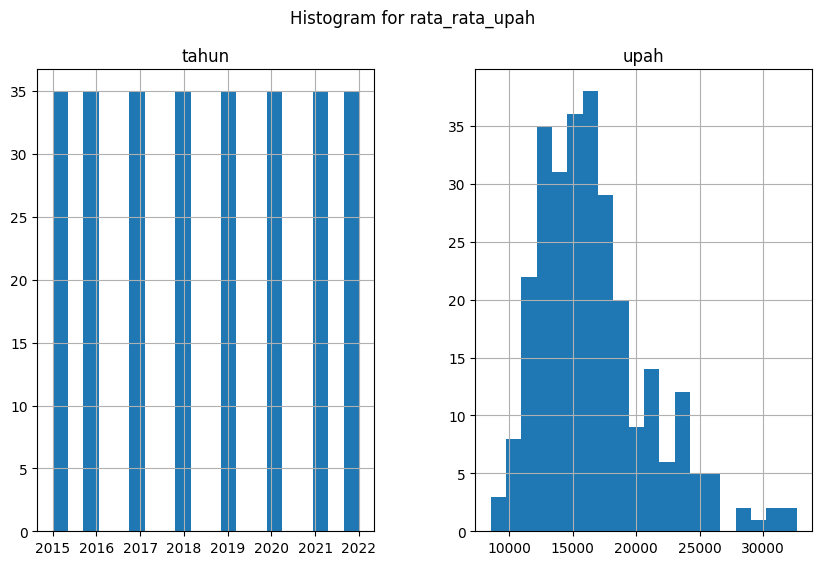

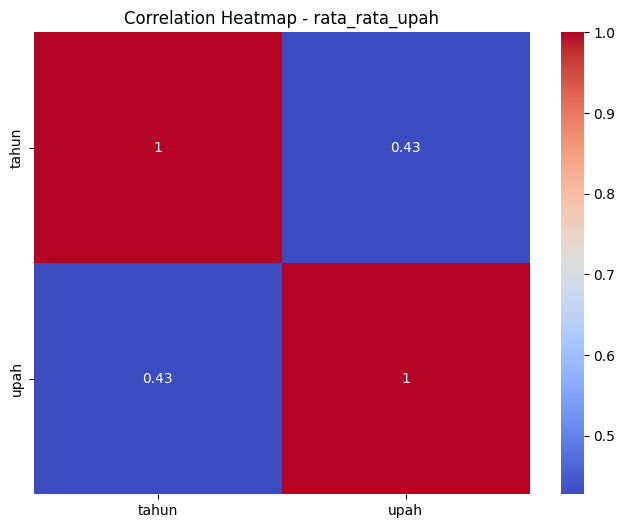

In [6]:
# 3. Analisis Distribusi dan Korelasi
for name, df in datasets.items():
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols].hist(figsize=(10, 6), bins=20)
    plt.suptitle(f'Histogram for {name}')
    plt.show()

    # Heatmap korelasi
    if len(numerical_cols) > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap - {name}')
        plt.show()

## 4. visualisasi data
**Garis Kemiskinan**

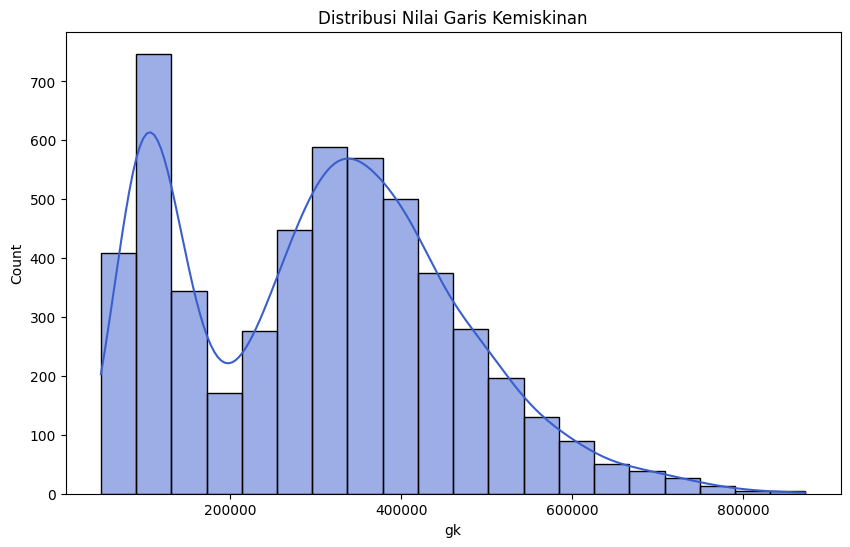

In [7]:
# Histogram untuk Distribusi Variabel Numerik
plt.figure(figsize=(10, 6))
sns.histplot(garis_kemiskinan['gk'], kde=True, color='#3A5FCD', bins=20)
plt.title('Distribusi Nilai Garis Kemiskinan')
plt.show()

<ipython-input-8-7b137e2f6e73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jenis', data=garis_kemiskinan, palette='viridis')


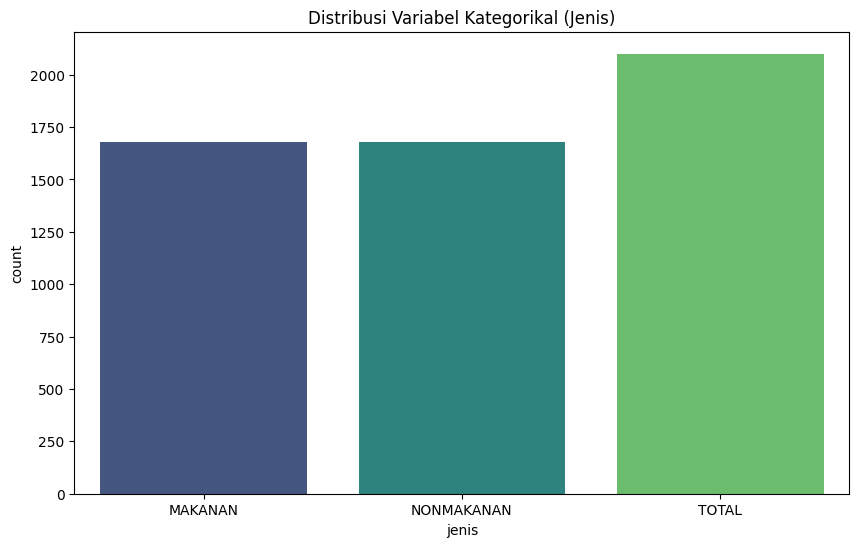

In [8]:
# Countplot untuk Distribusi Variabel Kategorikal (contoh: 'jenis')
plt.figure(figsize=(10, 6))
sns.countplot(x='jenis', data=garis_kemiskinan, palette='viridis')
plt.title('Distribusi Variabel Kategorikal (Jenis)')
plt.xticks(rotation=0)
plt.show()

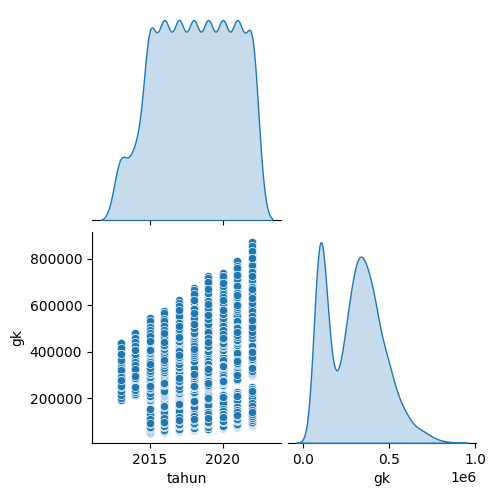

In [9]:
# Pairplot untuk Hubungan Antar Variabel Numerik
sns.pairplot(garis_kemiskinan, diag_kind='kde', corner=True)
plt.show()

**min_upah**

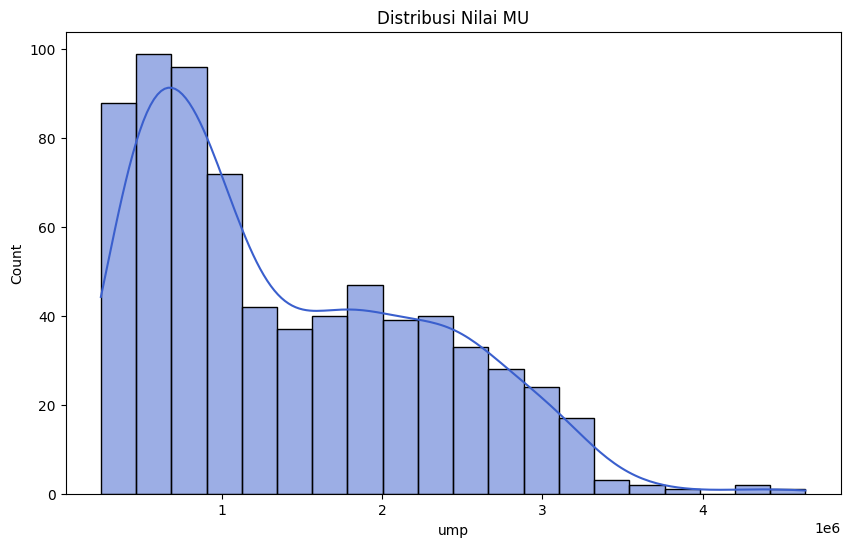

In [10]:
# Histogram untuk Distribusi Variabel Numerik
plt.figure(figsize=(10, 6))
sns.histplot(min_upah['ump'], kde=True, color='#3A5FCD', bins=20)
plt.title('Distribusi Nilai MU')
plt.show()

<ipython-input-11-28a7f461001e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='provinsi', data=min_upah, palette='viridis')


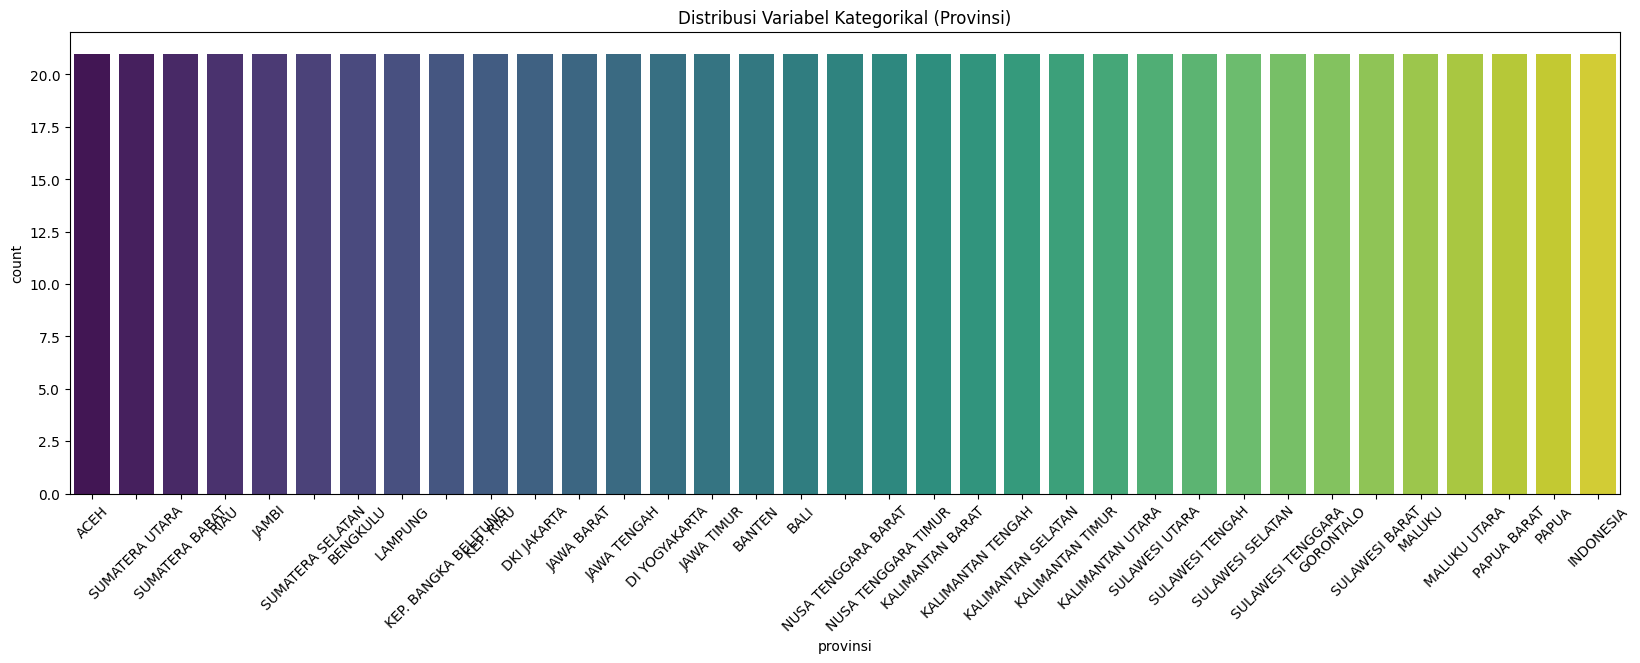

In [11]:
# Countplot untuk Distribusi Variabel Kategorikal (contoh: 'provinsi')
plt.figure(figsize=(20, 6))
sns.countplot(x='provinsi', data=min_upah, palette='viridis')
plt.title('Distribusi Variabel Kategorikal (Provinsi)')
plt.xticks(rotation=45)
plt.show()

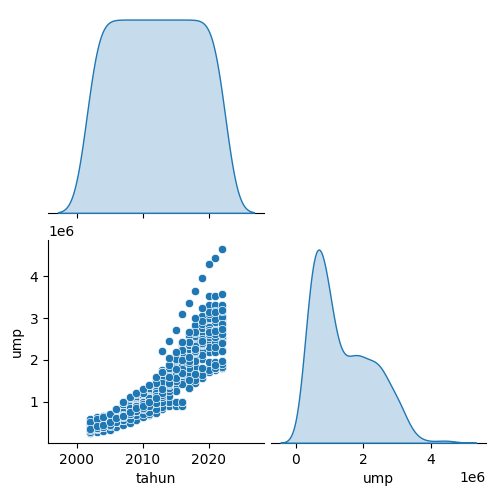

In [12]:
# Pairplot untuk Hubungan Antar Variabel Numerik
sns.pairplot(min_upah, diag_kind='kde', corner=True)
plt.show()

**Pengeluaran**

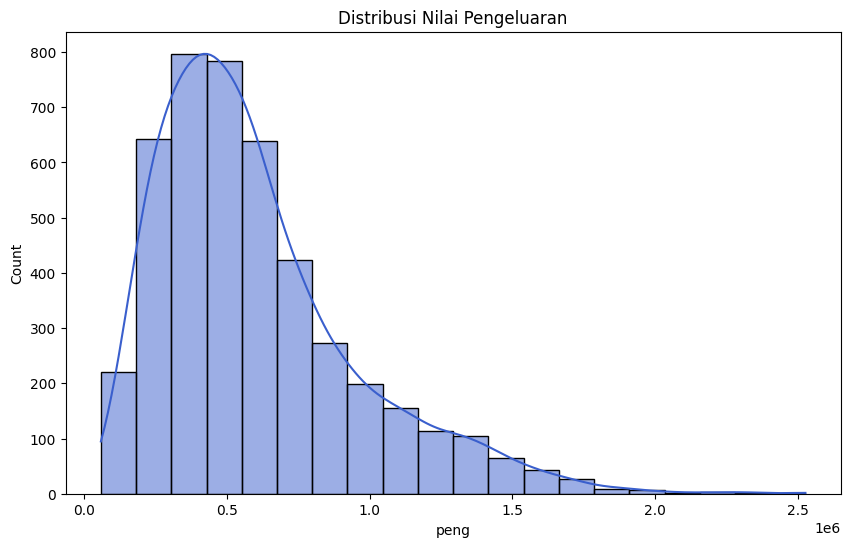

In [13]:
# Histogram untuk Distribusi Variabel Numerik
plt.figure(figsize=(10, 6))
sns.histplot(pengeluaran['peng'], kde=True, color='#3A5FCD', bins=20)
plt.title('Distribusi Nilai Pengeluaran')
plt.show()

<ipython-input-14-78a1716c9bf4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='daerah', data=pengeluaran, palette='viridis')


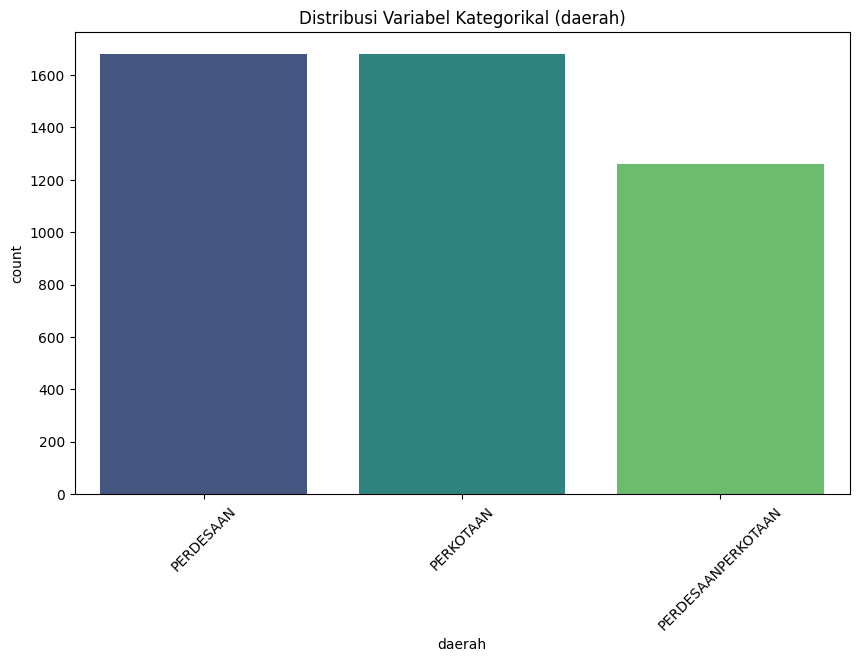

In [14]:
# Countplot untuk Distribusi Variabel Kategorikal (contoh: 'daerah')
plt.figure(figsize=(10, 6))
sns.countplot(x='daerah', data=pengeluaran, palette='viridis')
plt.title('Distribusi Variabel Kategorikal (daerah)')
plt.xticks(rotation=45)
plt.show()

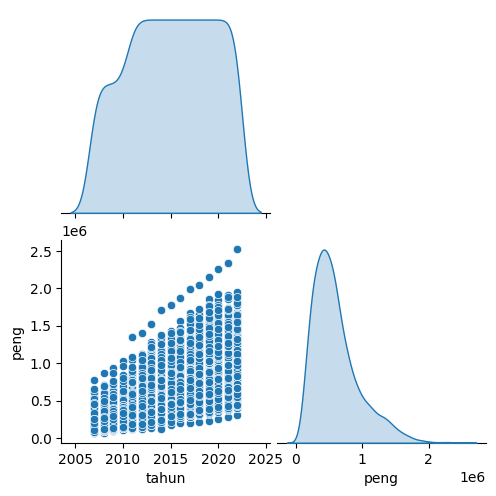

In [15]:
# Pairplot untuk Hubungan Antar Variabel Numerik
sns.pairplot(pengeluaran, diag_kind='kde', corner=True)
plt.show()

**rata_rata upah**

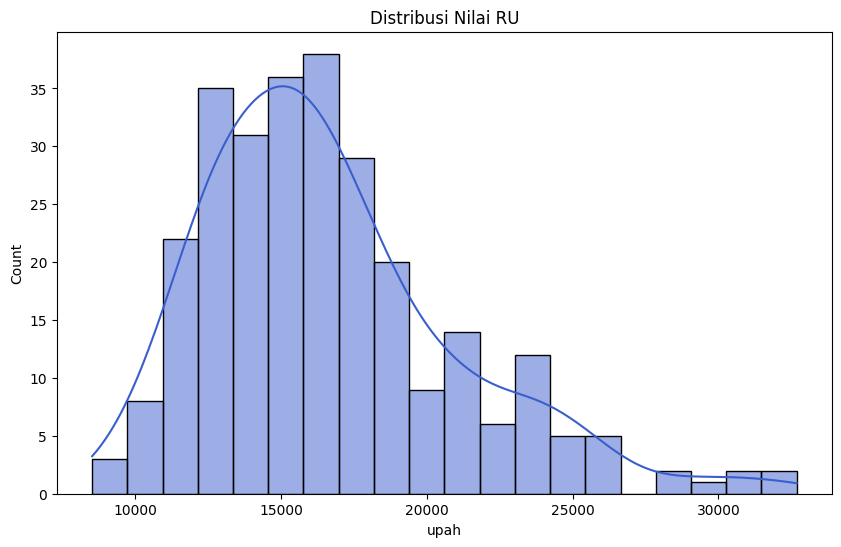

In [16]:
# Histogram untuk Distribusi Variabel Numerik
plt.figure(figsize=(10, 6))
sns.histplot(rata_rata_upah['upah'], kde=True, color='#3A5FCD', bins=20)
plt.title('Distribusi Nilai RU')
plt.show()

<ipython-input-17-55e5af0eecbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='provinsi', data=rata_rata_upah, palette='viridis')


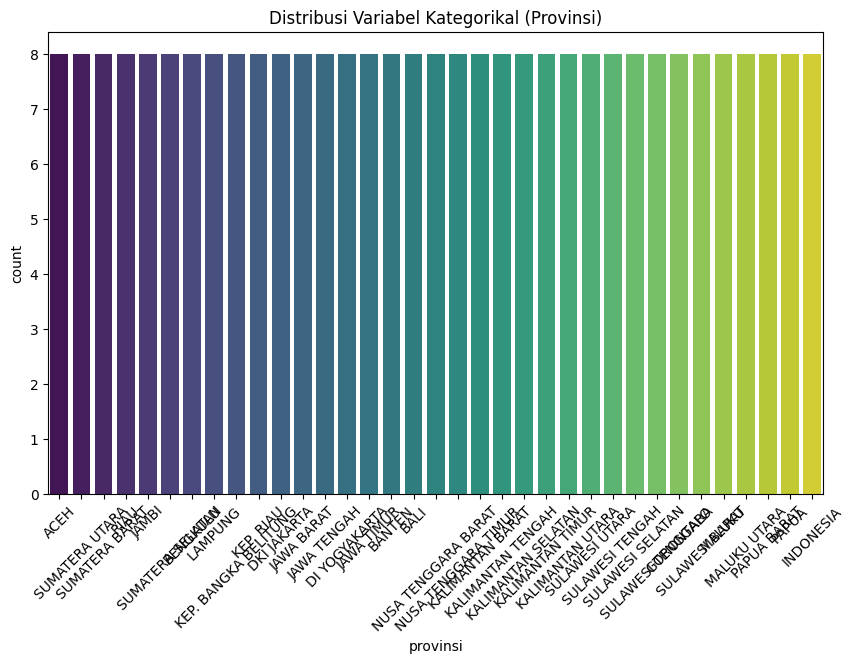

In [17]:
# Countplot untuk Distribusi Variabel Kategorikal (contoh: 'provinsi')
plt.figure(figsize=(10, 6))
sns.countplot(x='provinsi', data=rata_rata_upah, palette='viridis')
plt.title('Distribusi Variabel Kategorikal (Provinsi)')
plt.xticks(rotation=45)
plt.show()

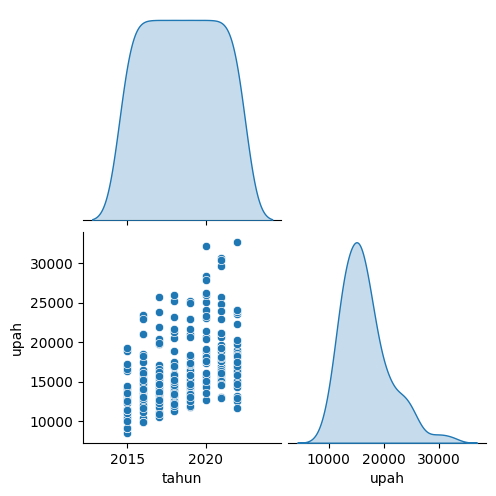

In [18]:
# Pairplot untuk Hubungan Antar Variabel Numerik
sns.pairplot(rata_rata_upah, diag_kind='kde', corner=True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menanganu Data Kosong (Missing Value)

In [19]:
# 1. Menangani Data yang Hilang
def handle_missing_values(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Apply function to each dataset
garis_kemiskinan = handle_missing_values(garis_kemiskinan)
min_upah = handle_missing_values(min_upah)
pengeluaran = handle_missing_values(pengeluaran)
rata_rata_upah = handle_missing_values(rata_rata_upah)

# Check if missing values are handled
print("Missing values after handling:")
print("garis_kemiskinan:\n", garis_kemiskinan.isnull().sum())
print("min_upah:\n", min_upah.isnull().sum())
print("pengeluaran:\n", pengeluaran.isnull().sum())
print("rata_rata_upah:\n", rata_rata_upah.isnull().sum())


Missing values after handling:
garis_kemiskinan:
 provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64
min_upah:
 provinsi    0
tahun       0
ump         0
dtype: int64
pengeluaran:
 provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64
rata_rata_upah:
 provinsi    0
tahun       0
upah        0
dtype: int64


<ipython-input-19-2323f5f99449>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-19-2323f5f99449>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## 2. Menghapus Data Duplikat

In [20]:
# 2.Remove duplicates from each dataset
def remove_duplicates(df, name):
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"Removed {before - after} duplicate rows from {name}")
    return df

garis_kemiskinan = remove_duplicates(garis_kemiskinan, "garis_kemiskinan")
min_upah = remove_duplicates(min_upah, "min_upah")
pengeluaran = remove_duplicates(pengeluaran, "pengeluaran")
rata_rata_upah = remove_duplicates(rata_rata_upah, "rata_rata_upah")


Removed 0 duplicate rows from garis_kemiskinan
Removed 0 duplicate rows from min_upah
Removed 0 duplicate rows from pengeluaran
Removed 0 duplicate rows from rata_rata_upah


## 3. Normalisasi atau Standarisasi Fitur

In [21]:
# Normalize numerical features
scaler = MinMaxScaler()
def normalize_features(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

garis_kemiskinan = normalize_features(garis_kemiskinan)
min_upah = normalize_features(min_upah)
pengeluaran = normalize_features(pengeluaran)
rata_rata_upah = normalize_features(rata_rata_upah)

## 4. Deteksi dan Penanganan Outlier

In [22]:
# 4. Deteksi dan Penanganan Outlier
for name, df in datasets.items():
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

## 5. Encoding Data Kategorikal

In [23]:
# 5. Encoding Data Kategorikal
encoder = LabelEncoder()
for name, df in datasets.items():
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])


## 6. Binning (Pengelompokan Data)

In [24]:
# 6.Binning numerical features
def binning_features(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[f'{col}_bin'] = pd.qcut(df[col].rank(method='first'), q=4, labels=False)
    return df

garis_kemiskinan = binning_features(garis_kemiskinan)
min_upah = binning_features(min_upah)
pengeluaran = binning_features(pengeluaran)
rata_rata_upah = binning_features(rata_rata_upah)

In [25]:
# Merge datasets with selected columns
all_dataset = garis_kemiskinan[['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk']]
all_dataset = all_dataset.merge(min_upah[['provinsi', 'tahun', 'ump']], on=['provinsi', 'tahun'], how='inner')
all_dataset = all_dataset.merge(pengeluaran[['provinsi', 'tahun', 'peng']], on=['provinsi', 'tahun'], how='inner')
all_dataset = all_dataset.merge(rata_rata_upah[['provinsi', 'tahun', 'upah']], on=['provinsi', 'tahun'], how='inner')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [27]:
# Clustering using K-Means
features = all_dataset.select_dtypes(include=['float64', 'int64'])

In [28]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [29]:
# Determine optimal number of clusters using Silhouette Score
silhouette_scores = {}
best_k = None
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores[k] = score
    print(f'Silhouette Score for {k} clusters: {score:.4f}')
    if score >= 0.7:
        best_k = k
        break

if best_k:
    print(f'Optimal number of clusters based on Silhouette Score: {best_k}')
else:
    print('No cluster configuration reached a silhouette score of 0.7.')

Silhouette Score for 2 clusters: 0.6005
Silhouette Score for 3 clusters: 0.5418
Silhouette Score for 4 clusters: 0.4981
Silhouette Score for 5 clusters: 0.4630
Silhouette Score for 6 clusters: 0.4293
Silhouette Score for 7 clusters: 0.3969
Silhouette Score for 8 clusters: 0.3688
Silhouette Score for 9 clusters: 0.3470
Silhouette Score for 10 clusters: 0.3176
No cluster configuration reached a silhouette score of 0.7.


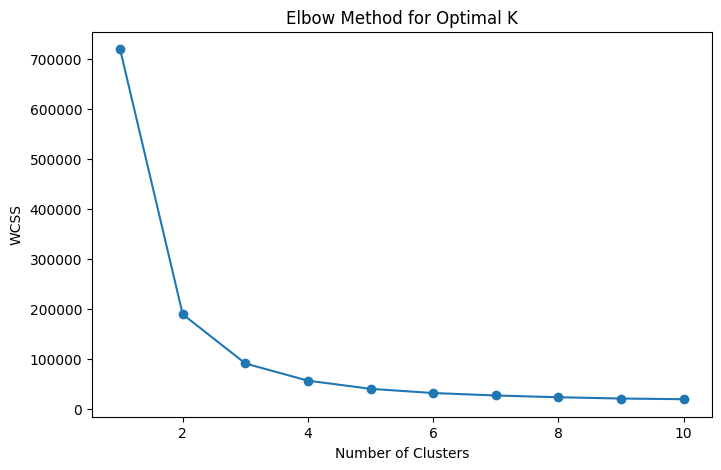

In [30]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  6930 non-null   int64  
 1   jenis     6930 non-null   int64  
 2   daerah    6930 non-null   int64  
 3   tahun     6930 non-null   float64
 4   periode   6930 non-null   int64  
 5   gk        6930 non-null   float64
 6   ump       6930 non-null   float64
 7   peng      6930 non-null   float64
 8   upah      6930 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 487.4 KB


In [32]:
all_dataset.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah
0,0,0,2,1.0,0,0.485231,0.664443,0.232895,0.341349
1,0,0,2,1.0,0,0.485231,0.664443,0.140635,0.341349
2,0,0,2,1.0,0,0.485231,0.664443,0.397542,0.341349
3,0,0,2,1.0,0,0.485231,0.664443,0.274501,0.341349
4,0,0,2,1.0,0,0.485231,0.664443,0.266487,0.341349


In [33]:
# Feature Selection using SelectKBest
features = all_dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['gk'])  # Pastikan target tidak termasuk dalam fitur
target = all_dataset['gk']  # Pastikan target benar

selector = SelectKBest(score_func=f_classif, k=5)  # Pilih 5 fitur terbaik
selected_features = selector.fit_transform(features, target)
selected_feature_names = features.columns[selector.get_support()]

print(f"Selected features: {list(selected_feature_names)}")

Selected features: ['provinsi', 'jenis', 'daerah', 'tahun', 'periode']


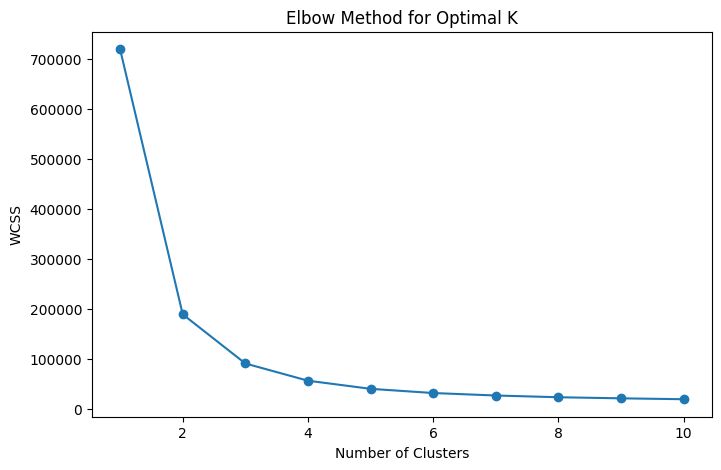

Silhouette Score for 2 clusters: 0.6021
Silhouette Score for 3 clusters: 0.5445
Silhouette Score for 4 clusters: 0.5008
Silhouette Score for 5 clusters: 0.4685
Silhouette Score for 6 clusters: 0.4355
Silhouette Score for 7 clusters: 0.4041
Silhouette Score for 8 clusters: 0.3791
Silhouette Score for 9 clusters: 0.3519
Silhouette Score for 10 clusters: 0.3265
No cluster configuration reached a silhouette score of 0.7.


In [34]:
# Clustering using K-Means
features_selected = all_dataset[selected_feature_names]

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_selected)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Determine optimal number of clusters using Silhouette Score
silhouette_scores = {}
best_k = None
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_selected)
    score = silhouette_score(features_selected, labels)
    silhouette_scores[k] = score
    print(f'Silhouette Score for {k} clusters: {score:.4f}')
    if score >= 0.7:
        best_k = k
        break

if best_k:
    print(f'Optimal number of clusters based on Silhouette Score: {best_k}')
else:
    print('No cluster configuration reached a silhouette score of 0.7.')

In [35]:
# Clustering before feature selection
original_features = all_dataset.drop(columns=['gk'])
best_k_before = 2
kmeans_before = KMeans(n_clusters=best_k_before, random_state=42, n_init=10)
labels_before = kmeans_before.fit_predict(original_features)
silhouette_before = silhouette_score(original_features, labels_before)
print(f"Silhouette Score before feature selection: {silhouette_before:.4f}")

# Feature Selection using SelectKBest
features = all_dataset.drop(columns=['gk'])
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(features, all_dataset['gk'])
selected_feature_names = features.columns[selector.get_support()]
all_dataset = all_dataset[selected_feature_names]
print(f"Selected features: {list(selected_feature_names)}")

# Clustering after feature selection
best_k_after = 2
kmeans_after = KMeans(n_clusters=best_k_after, random_state=42, n_init=10)
labels_after = kmeans_after.fit_predict(all_dataset)
silhouette_after = silhouette_score(all_dataset, labels_after)
print(f"Silhouette Score after feature selection: {silhouette_after:.4f}")

# Compare performance
if silhouette_after > silhouette_before:
    print("Feature selection improved clustering performance.")
else:
    print("Feature selection did not improve clustering performance.")

Silhouette Score before feature selection: 0.6010
Selected features: ['provinsi', 'jenis', 'daerah', 'tahun', 'periode']
Silhouette Score after feature selection: 0.6021
Feature selection improved clustering performance.


In [36]:
# Train final K-Means model if a suitable cluster count is found
if best_k_after:
    final_kmeans = KMeans(n_clusters=best_k_after, random_state=42, n_init=10)
    all_dataset['cluster'] = final_kmeans.fit_predict(all_dataset)
    print("Clustering selesai. Label Cluster ditambahkan ke dataset all_dataset.")

Clustering selesai. Label Cluster ditambahkan ke dataset all_dataset.


In [37]:
all_dataset.head(100)

,provinsi,jenis,daerah,tahun,periode,cluster
0,0,0,2,1.0,0,0
1,0,0,2,1.0,0,0
2,0,0,2,1.0,0,0
3,0,0,2,1.0,0,0
4,0,0,2,1.0,0,0
...,...,...,...,...,...,...
95,0,1,1,1.0,0,0
96,0,1,1,1.0,0,0
97,0,1,1,1.0,0,0
98,0,1,1,1.0,0,0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

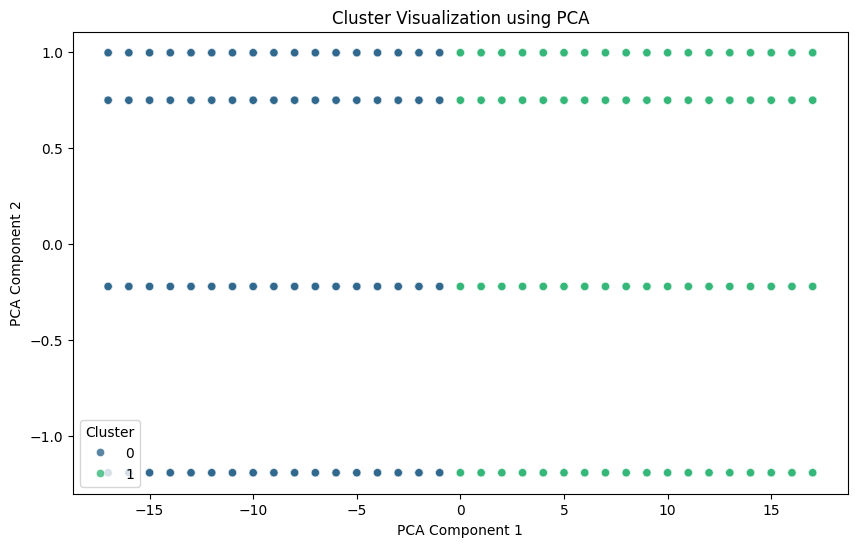

In [38]:
# Pastikan clustering sudah dilakukan
if 'cluster' in all_dataset.columns and not all_dataset.empty:
    try:
        # Reduksi dimensi menggunakan PCA ke 2 komponen utama
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(all_dataset.drop(columns=['cluster'], errors='ignore'))

        # Simpan hasil PCA ke dataset
        all_dataset = all_dataset.copy()  # Hindari SettingWithCopyWarning
        all_dataset['pca1'] = reduced_data[:, 0]
        all_dataset['pca2'] = reduced_data[:, 1]

        # Scatter plot hasil clustering dalam ruang PCA 2D
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='pca1', y='pca2', hue=all_dataset['cluster'], data=all_dataset, palette='viridis', alpha=0.8)
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title('Cluster Visualization using PCA')
        plt.legend(title='Cluster')
        plt.show()

    except Exception as e:
        print(f"Terjadi kesalahan saat melakukan PCA atau visualisasi: {e}")
else:
    print("Error: Clustering belum dilakukan atau dataset kosong. Pastikan model sudah dilatih sebelum visualisasi.")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [50]:
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  6930 non-null   int64  
 1   jenis     6930 non-null   int64  
 2   daerah    6930 non-null   int64  
 3   tahun     6930 non-null   float64
 4   periode   6930 non-null   int64  
 5   cluster   6930 non-null   int32  
 6   pca1      6930 non-null   float64
 7   pca2      6930 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 406.2 KB


In [51]:
# 1. Pastikan scaler difit hanya pada 4 kolom numerik
numerical_cols = ['provinsi', 'jenis', 'daerah', 'periode']
X = all_dataset[numerical_cols].dropna()  # <--- sama dengan saat kamu latih model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 3. Inverse transform dari X_scaled
X_inverse = scaler.inverse_transform(X_scaled)
df_inverse = pd.DataFrame(X_inverse, columns=numerical_cols)

# 4. Gabungkan kolom info lainnya dan label cluster
info_cols = all_dataset.dropna(subset=numerical_cols)[['provinsi', 'tahun', 'jenis', 'daerah']].reset_index(drop=True)
df_final = pd.concat([info_cols, df_inverse], axis=1)
df_final['cluster'] = labels


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [59]:
# Hitung statistik deskriptif tiap cluster
cluster_summary = df_final.groupby('cluster')[
    ['provinsi', 'tahun', 'jenis', 'daerah']
].mean().round(2)

print("Karakteristik Rata-rata per Cluster:\n")
print(cluster_summary)

Karakteristik Rata-rata per Cluster:

         provinsi  provinsi  tahun  jenis  jenis  daerah  daerah
cluster                                                         
0           14.59     14.59   1.00   0.39   0.39    0.98    0.98
1           17.00     17.00   0.82   1.18   1.18    1.00    1.00
2           18.97     18.97   0.67   1.83   1.83    1.01    1.01


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Provinsi rata-rata:** 14.59 → campuran, tapi cenderung di tengah urutan provinsi
- **Tahun:** 1.00 → bisa diasumsikan mayoritas data tahun 2021 atau 2022 (tergantung cara encode)
- **Jenis:** 0.39 → dominan kota
- **Daerah: 0.98** → hampir seluruhnya perkotaan

Cluster ini merepresentasikan daerah kota di wilayah perkotaan, dengan distribusi provinsi menengah. Bisa jadi ini adalah cluster dengan fasilitas ekonomi & sosial yang lebih lengkap.

## Cluster 2:
- **Provinsi rata-rata:** 17.00 → provinsi dengan urutan label menengah-atas  
- **Jenis:** 1.18 → dominan kabupaten
- **Daerah:** 1.00 → hampir seluruhnya pedesaan
Cluster ini terdiri dari wilayah kabupaten di pedesaan, kemungkinan dengan keterbatasan infrastruktur. Bisa jadi cluster ini rentan terhadap masalah ekonomi dan sosial.

## Cluster 3:
- **Provinsi rata-rata:** 18.97 → provinsi dengan label tinggi  
- **Jenis:** 1.83 → sangat dominan kabupaten  
- **Daerah:** 1.01 → seluruhnya pedesaan
 Cluster ini bisa jadi mewakili wilayah pedesaan dari provinsi-provinsi dengan label tinggi, yang mungkin merupakan provinsi besar atau dengan karakteristik geografis tertentu. Kemungkinan besar cluster ini perlu pendekatan kebijakan pembangunan pedesaan yang spesifik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [60]:
# Simpan dataset ke file CSV
all_dataset.to_csv('all_dataset.csv', index=False)

# Konfirmasi penyimpanan berhasil
print("File berhasil disimpan sebagai all_dataset.csv")


File berhasil disimpan sebagai all_dataset.csv


In [62]:
all_dataset.head()

,provinsi,jenis,daerah,tahun,periode,cluster,pca1,pca2
0,0,0,2,1.0,0,0,-17.0,-1.190099
1,0,0,2,1.0,0,0,-17.0,-1.190099
2,0,0,2,1.0,0,0,-17.0,-1.190099
3,0,0,2,1.0,0,0,-17.0,-1.190099
4,0,0,2,1.0,0,0,-17.0,-1.190099
